In [2]:
import numpy as np
import matplotlib.pyplot as plt

364


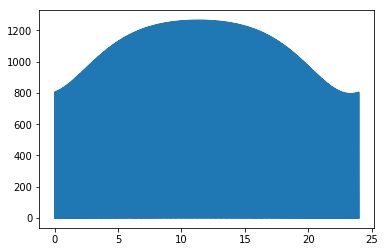

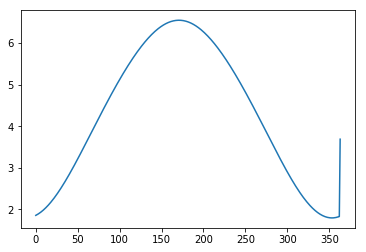

In [38]:
def delta(t):
    return np.deg2rad(23.45)*np.sin(np.deg2rad((360/365)*(t/24-81)))

def h(t):
    return -np.pi + np.deg2rad(360*t/24)

def costheta(t, phi):
    return np.sin(phi)*np.sin(delta(t))+np.cos(phi)*np.cos(delta(t))*np.cos(h(t))

def AM(t,phi):
    r = 6371*1000 # in meters
    return np.sqrt((r*costheta(t,phi))**2+2*r+1)-r*costheta(t,phi)

def Id(t, phi):
    IS = 1353 # in watts per meter^2
    factor = 1.25 # the factor for taking account DHI
    return factor*1.1*IS*0.7**(AM(t,phi)**0.678)

def Im(t,phi,beta):
    return Id(t,phi)*np.sin(np.pi/2-phi+delta(t)+beta)

start = 24*180

phi = np.deg2rad(50.41)
beta = np.deg2rad
resolution = 0.01

t = np.arange(1,365*24, resolution)
ti = len(t)
ytheta = np.zeros(ti)
yh = np.zeros(ti)
ydelta = np.zeros(ti)
yAM = np.zeros(ti)
yId = np.zeros(ti)
yapprox = np.zeros(ti)
print(int(np.floor(ti/(24/resolution))))
yavg = np.zeros(int(np.floor(ti/(24/resolution))))

for i in range(ti):
    ytheta[i] =costheta(t[i], phi)
    yAM[i] = AM(t[i],phi)
    data = Id(t[i],phi)
    yId[i] = data
    yavg[int(np.floor(i/(24/resolution)))-1] = yavg[int(np.floor(i/(24/resolution)))-1] + data*resolution

yavg = yavg / (24/resolution)    

# plt.plot(t,ytheta)
plt.figure()
plt.plot(t/365,yId)
plt.figure()
plt.plot(yavg)

ValueError: x and y must have same first dimension, but have shapes (364,) and (1,)

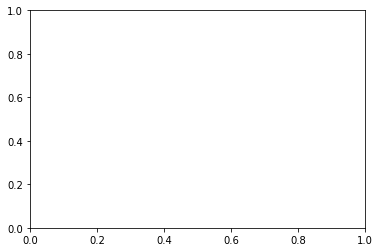

In [23]:
def deltad(d):
    return np.deg2rad(23.45)*np.sin(np.deg2rad((360/365)*(d-81)))

hd = np.pi/4

def costhetad(d, phi):
    return np.sin(phi)*np.sin(deltad(d))+np.cos(phi)*np.cos(deltad(d))*np.cos(hd)

def AM(d,phi):
    r = 6371*1000 # in meters
    return np.sqrt((r*costhetad(d,phi))**2+2*r+1)-r*costhetad(d,phi)

def Id(d, phi):
    IS = 1353 # in watts per meter^2
    factor = 1.25 # the factor for taking account DHI
    return factor*1.1*IS*0.7**(AM(d,phi)**0.678)

def Im(d,phi,beta):
    return Id(d,phi)*np.sin(np.pi/2-phi+delta(d)+beta)

start = 24*180

phi = np.deg2rad(50.41)
beta = np.deg2rad

t = np.arange(1,365)
ti = len(t)
ytheta = np.zeros(ti)
yh = np.zeros(ti)
ydelta = np.zeros(ti)
yAM = np.zeros(ti)
yId = np.zeros(ti)

for i in range(ti):

     yId[i] = Id(t[i],phi)


# plt.plot(t,ytheta)
plt.figure()
plt.plot(t,Id(t[i],phi))

In [ ]:
#### sine fit of the solar irradiance data to create a surrogate model for lighter computation ####

# algorithm taken from:
# https://stackoverflow.com/questions/16716302/how-do-i-fit-a-sine-curve-to-my-data-with-pylab-and-numpy#16716964

from scipy import optimize

def fit_sin(tt, yy):
    '''Fit sin to the input time sequence, and return fitting parameters "amp", "omega", "phase", "offset", "freq", "period" and "fitfunc"'''
    tt = np.array(tt)
    yy = np.array(yy)
    ff = np.fft.fftfreq(len(tt), (tt[1]-tt[0]))   # assume uniform spacing
    Fyy = abs(np.fft.fft(yy))
    guess_freq = abs(ff[np.argmax(Fyy[1:])+1])   # excluding the zero frequency "peak", which is related to offset
    guess_amp = np.std(yy) * 2.**0.5
    guess_offset = np.mean(yy)
    guess = np.array([guess_amp, 2.*np.pi*guess_freq, 0., guess_offset])

    def sinfunc(t, A, w, p, c):  
        return A * np.sin(w*t + p) + c
    
    popt, pcov = optimize.curve_fit(sinfunc, tt, yy, p0=guess)
    A, w, p, c = popt
    f = w/(2.*np.pi)
    fitfunc = lambda t: A * np.sin(w*t + p) + c
    return {"amp": A, "omega": w, "phase": p, "offset": c, "freq": f, "period": 1./f, "fitfunc": fitfunc, "maxcov": np.max(pcov), "rawres": (guess,popt,pcov)}

tt = np.arange(365)

res = fit_sin(tt, yavg)
print( "Amplitude=%(amp)s, Angular freq.=%(omega)s, phase=%(phase)s, offset=%(offset)s, Max. Cov.=%(maxcov)s" % res )

plt.plot(tt, yavg, "ob", label="y", linewidth=2)
# plt.plot(tt, yynoise, "ok", label="y with noise")
plt.plot(tt2, res["fitfunc"](tt2), "k-", label="y fit curve", linewidth=2)
plt.legend(loc="best")
plt.show()

## resulting in the fit of 241.37*sin(0.01629d - 1.211) + 413.47
# this function can then be used to calculate the module irradiance

In [ ]:
print (yavg[362])

In [ ]:
from scipy import optimize

def test_func(x, a, b, c, d):
    return a * np.sin(b * x + c) + d

params, params_covariance = optimize.curve_fit(test_func, t, yId)

print(params)

yfit = np.zeros(ti)

for i in range(ti):
    yfit[i]=test_func(i, params[0], params[1], params[2], params[3])

plt.figure()
plt.plot(t, yId)
plt.plot(t, yfit)

-0.14698528930819993
-0.1295319967882566
-0.11207870426831334
-0.09462541174837003
-0.0771721192284267
-0.05971882670848344
-0.04226553418854012
-0.024812241668596857
-0.0073589491486535374
0.010094343371289782
0.02754763589123299
0.04500092841117631
0.06245422093111963
0.07990751345106295
0.09736080597100627
0.11481409849094948
0.1322673910108928
0.14972068353083612
0.16717397605077944
0.18462726857072265
0.20208056109066597
0.2195338536106093
0.2369871461305526
0.2544404386504959
0.27189373117043913
0.28934702369038245
0.3068003162103258
0.3242536087302691
0.3417069012502124
0.3591601937701556
0.37661348629009894
0.39406677881004226
0.4115200713299856
0.4289733638499288
0.4464266563698721
0.46387994888981543
0.48133324140975875
0.49878653392970207
0.5162398264496454
0.5336931189695887
0.5511464114895318
0.5685997040094751
0.5860529965294184
0.6035062890493618
0.6209595815693051
0.6384128740892484
0.6558661666091917
0.673319459129135
0.6907727516490784
0.7082260441690215


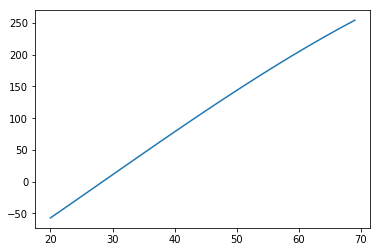

In [29]:
def deltad(d):
    return np.deg2rad(23.45)*np.sin(np.deg2rad((360/365)*(d-81)))

hd = np.pi/4

def costhetad(d, phi):
    return np.sin(phi)*np.sin(deltad(d))+np.cos(phi)*np.cos(deltad(d))*np.cos(hd)

def AM(d,phi):
    r = 6371*1000 # in meters
    return np.sqrt((r*costhetad(d,phi))**2+2*r+1)-r*costhetad(d,phi)

def Id(d, phi):
    IS = 1353 # in watts per meter^2
    factor = 1.25 # the factor for taking account DHI
    return factor*1.1*IS*0.7**(AM(d,phi)**0.678)

def Im(d,phi,beta):
    return Id(d,phi)*np.sin(np.pi/2-phi+delta(d)+beta)

angles = range(20,70)
ya = np.zeros(len(angles))

for i in range(len(angles)):
    print(np.pi/4 - phi + deltad(1) + np.deg2rad(angles[i]))
    ya[i] = Id(1,phi)*np.sin(np.pi/4 - phi + deltad(1) + np.deg2rad(angles[i]))
    
plt.plot(angles, ya)

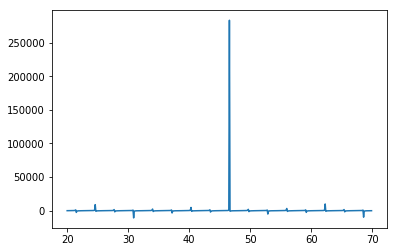

In [33]:
def g5(beta1, beta2, A1):
    return (164.7*np.sin(beta2))/np.sin(np.pi-beta1-beta2)-A1

def g6(beta1, beta2, A2):
    return (164.7*np.sin(beta1))/np.sin(np.pi-beta1-beta2)-A2

angles = np.arange(20,70,0.1)
ya = np.zeros(len(angles))

for i in range(len(angles)):
    ya[i] = g5(np.deg2rad(30),angles[i],1)
    
plt.plot(angles,ya)


In [37]:
from scipy import optimize
# x = beta1, beta2, area1, area2
def objective(x):
    return -solar(x[0],x[2]) - solar(-x[1],x[3])

def solar(beta, area):
    return area*0.25*1.25*1.1*1353*0.7**(AM(1,phi)**0.678)*np.sin(np.pi/4-phi+deltad(1)+beta)

def g1(x):
    return np.deg2rad(20)-x[0]
def g2(x):
    return np.deg2rad(20)-x[1]
def g3(x):
    return x[0]-np.deg2rad(70)
def g4(x):
    return x[1]-np.deg2rad(70)
def g5(x):
    return (164.7*np.sin(x[1])/np.sin(np.pi-x[0]-x[1]))-x[2]
def g6(x):
    return (164.7*np.sin(x[0])/np.sin(np.pi-x[0]-x[1]))-x[3]

x0=[np.deg2rad(20),np.deg2rad(20),20,20]

G1 = {
    'type': 'ineq',
    'fun': g1
}
G2 = {
    'type': 'ineq',
    'fun': g2
}
G3 = {
    'type': 'ineq',
    'fun': g3
}
G4 = {
    'type': 'ineq',
    'fun': g4
}
G5 = {
    'type': 'ineq',
    'fun': g5
}
G6 = {
    'type': 'ineq',
    'fun': g6
}

sol = optimize.minimize(objective, x0, method='SLSQP', constraints= [G1, G2, G3, G4, G5, G6])
print(sol)

     fun: -29856.731781952018
     jac: array([ 3.27201660e+03, -2.65236650e+04, -2.40820312e+00,  7.32041016e+01])
 message: 'Inequality constraints incompatible'
    nfev: 40
     nit: 6
    njev: 5
  status: 4
 success: False
       x: array([ 5.20675581e-01,  3.49733926e-01, -3.34655274e+01, -4.08955714e+02])
